<a href="https://colab.research.google.com/github/mesushan/CNN-for-image-Classification/blob/master/cnn_for_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
input_size = (128, 128)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu"),  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (input_size[0], input_size[1],3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    # tf.keras.layers.Dense(550,activation="relu"),      #Adding the Hidden layer
    # tf.keras.layers.Dropout(0.1,seed = 2019),
    # tf.keras.layers.Dense(400,activation ="relu"),
    # tf.keras.layers.Dropout(0.3,seed = 2019),
    # tf.keras.layers.Dense(300,activation="relu"),
    # tf.keras.layers.Dropout(0.4,seed = 2019),
    tf.keras.layers.Dense(128,activation ="relu"),
    tf.keras.layers.Dropout(0.4,seed = 2019),
    tf.keras.layers.Dropout(0.2,seed = 2019),
    tf.keras.layers.Dropout(0.1,seed = 2019),
    tf.keras.layers.Dense(7,activation = "softmax")   #Adding the Output Layer
])

In [3]:
# Initialising the CNN
# model = tf.keras.models.Sequential()

In [4]:
# 32 feature detectors with 3*3 dimensions so the convolution layer compose of 32 feature maps
# 128 by 128 dimensions with colored image(3 channels)  (tensorflow backend)
# input_size = (128, 128)
# model.add(tf.keras.layers.Convolution2D(32, 3, 3, input_shape = (input_size[0], input_size[1],3), activation = 'relu'))

In [5]:
# reduce the size of feature maps and therefore reduce the number of nodes in the future fully connected layer (reduce time complexity, less compute intense without losing the performace). 2 by 2 deminsion is the recommended option
# model.add(tf.keras.layers.MaxPooling2D(pool_size = (3, 3)))

In [6]:
# model.add(tf.keras.layers.Convolution2D(64, 3, 3, activation = 'relu'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

In [7]:
# flatten all the feature maps in the pooling layer into single vector
# model.add(tf.keras.layers.Flatten())

In [8]:
# making classic ann which compose of fully connected layers
# number of nodes in hidden layer (output_dim) (common practice is to take the power of 2)
# model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
# # model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Dense(units = 7, activation = 'softmax'))

In [4]:
# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
# image augmentation technique to enrich our dataset(training set) without adding more images so get good performance  results with little or no overfitting even with the small amount of images
# used from keras documentation (flow_from_directory method)

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

batch_size = 50
# image augmentation part
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# create training set
# wanna get higher accuracy -> inccrease target_size
training_set = train_datagen.flow_from_directory('C:\\Users\VA\Documents\workspace\dump_cnn\dataset\\train',
                                                 target_size = input_size,
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

# create test set
# wanna get higher accuracy -> inccrease target_size
test_set = test_datagen.flow_from_directory('C:\\Users\VA\Documents\workspace\dump_cnn\dataset\\test',
                                            target_size = input_size,
                                            batch_size = batch_size,
                                            class_mode = 'categorical')

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# fit the cnn model to the trainig set and testing it on the test set
history = model.fit(training_set,
          steps_per_epoch = len(training_set),
          epochs = 30,
          validation_data = test_set,
          validation_steps = len(test_set),
          callbacks=[early_stopping])

Found 688 images belonging to 7 classes.


Found 187 images belonging to 7 classes.
Epoch 1/30
14/14 [==============================] - 18s 1s/step - loss: 0.1640 - accuracy: 0.9578 - val_loss: 0.4167 - val_accuracy: 0.8717
Epoch 2/30
14/14 [==============================] - 16s 1s/step - loss: 0.1097 - accuracy: 0.9564 - val_loss: 0.3986 - val_accuracy: 0.8770
Epoch 3/30
14/14 [==============================] - 16s 1s/step - loss: 0.1048 - accuracy: 0.9622 - val_loss: 0.4125 - val_accuracy: 0.8717
Epoch 4/30
14/14 [==============================] - 17s 1s/step - loss: 0.1037 - accuracy: 0.9593 - val_loss: 0.3854 - val_accuracy: 0.8930
Epoch 5/30
14/14 [==============================] - 16s 1s/step - loss: 0.0928 - accuracy: 0.9637 - val_loss: 0.4141 - val_accuracy: 0.8717
Epoch 6/30
14/14 [==============================] - 15s 1s/step - loss: 0.1149 - accuracy: 0.9578 - val_loss: 0.4049 - val_accuracy: 0.8877
Epoch 7/30
14/14 [==============================] - 15s 1s/step - loss: 0.1004 - accuracy: 0.9666 - val_loss: 0.4646 - 

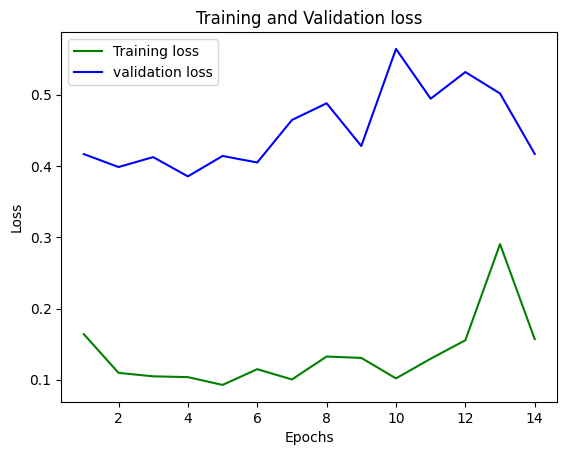

In [21]:
import matplotlib.pyplot as plt

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,15)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
# plt.plot(x, y, '-', color='green')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

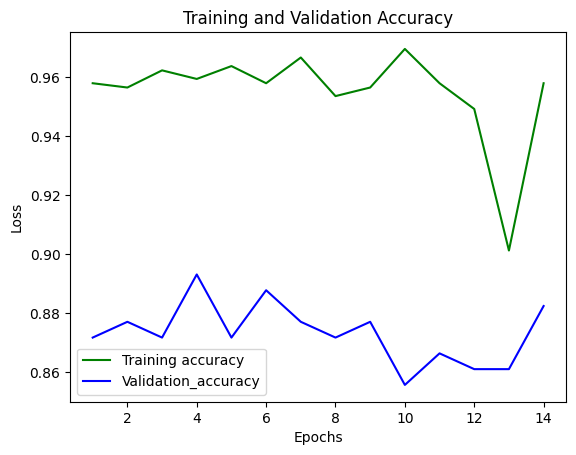

In [22]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1,15)
plt.plot(epochs, accuracy, 'g', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation_accuracy')
# plt.plot(x, y, '-', color='green')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# import os
# import numpy as np
# from sklearn.metrics import accuracy_score, classification_report

# # Define the paths to your training and test dataset directories
# train_dir = "C:\\Users\\VA\\Documents\\workspace\\dump_cnn\\dataset\\train"
# test_dir = "C:\\Users\\VA\\Documents\\workspace\\dump_cnn\\dataset\\test"

# # Get a list of class (folder) names based on the training data
# class_names = sorted(os.listdir(train_dir))

# # Initialize lists to store ground truth labels and predicted labels
# y_true = []
# y_pred = []

# # Iterate through each class folder
# for class_name in class_names:
#     class_train_dir = os.path.join(train_dir, class_name)
#     class_label = class_names.index(class_name)  # Assign a label based on folder name

#     # Iterate through images in the test class folder
#     class_test_dir = os.path.join(test_dir, class_name)
#     for image_name in os.listdir(class_test_dir):
#         image_path = os.path.join(class_test_dir, image_name)
#         # Here, you would load and preprocess the image and make predictions using your model
#         # Replace this with your actual prediction code
#         predicted_label = predictions(image_path)  # Replace with your prediction function

#         # Append the true label and predicted label
#         y_true.append(class_label)
#         y_pred.append(predicted_label)

# # Calculate overall accuracy
# overall_accuracy = accuracy_score(y_true, y_pred)

# # Calculate class-wise accuracy
# class_accuracy = classification_report(y_true, y_pred, target_names=class_names)

# # Print overall accuracy
# print(f"Overall Accuracy: {overall_accuracy}")

# # Print class-wise accuracy
# print("Class-wise Accuracy:")
# print(class_accuracy)


In [18]:
# model.save('cnn_v101.h5') #overfitting issue

In [23]:
import numpy as np
import keras.utils as image
# from keras.preprocessing import image

In [77]:
test_image = image.load_img('C:\\Users\VA\Documents\workspace\dump_cnn\dataset\\predict\\serebu.jpeg', target_size= input_size)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
test_image = test_image/255.0

1/1 [==============================] - 0s 29ms/step


In [78]:
training_set.class_indices

{'duapuluh': 0,
 'duaribu': 1,
 'limapuluh': 2,
 'limaribu': 3,
 'sepuluh': 4,
 'seratus': 5,
 'seribu': 6}

In [79]:
predictions = model.predict(test_image)
np.around(predictions[0],3)

1/1 [==============================] - 0s 26ms/step


array([0.269, 0.262, 0.043, 0.004, 0.001, 0.025, 0.396], dtype=float32)

In [80]:
class_index = np.argmax(predictions)
class_label = training_set.class_indices
predicted_class = list(class_label.keys())[list(class_label.values()).index(class_index)]
class_index

6

In [81]:
print("Predicted class:", predicted_class)
print("Class probabilities:", np.around(predictions[0],3))                  

Predicted class: seribu
Class probabilities: [0.269 0.262 0.043 0.004 0.001 0.025 0.396]


In [ ]:
training_set.class_indices

In [ ]:
result[0][0]

In [ ]:
result

In [ ]:
if result [0][0] == 1:
  prediction = 'duapuluh'
elif result [0][1] == 1:
  prediction = "limapuluh"
else:
  prediction = 'seratus'

In [ ]:
prediction

Accuracy : 0.88